# Kalp Hastalığı Risk Analizi: Veri Temizleme, Demografik Analiz ve Lojistik Regresyon Tabanlı Tahmin Modeli

In [1]:
import pandas as pd
import numpy as np


data = pd.read_csv("data.csv")


data.replace('?', np.nan, inplace=True)

print("Sütunlar:")
print(data.columns)


print("\nEksik değer sayısı:")
print(data.isnull().sum())


numeric_columns = ['age', 'trestbps', 'chol', 'thalach', 'oldpeak', 'ca']
for column in numeric_columns:
    data[column] = pd.to_numeric(data[column], errors='coerce')  # Sayısal veri türüne çevir
    median_value = data[column].median()
    data[column] = data[column].fillna(median_value)


categorical_columns = ['sex', 'cp', 'fbs', 'restecg', 'exang', 'slope', 'thal']
for column in categorical_columns:
    mode_value = data[column].mode()[0]
    data[column] = data[column].fillna(mode_value)


data.to_csv("cleaned_data.csv", index=False)

print("\nEksik değer sayısı (temizlendikten sonra):")
print(data.isnull().sum())


Sütunlar:
Index(['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'thal', 'num       '],
      dtype='object')

Eksik değer sayısı:
age             0
sex             0
cp              0
trestbps        1
chol           23
fbs             8
restecg         1
thalach         1
exang           1
oldpeak         0
slope         190
ca            291
thal          266
num             0
dtype: int64

Eksik değer sayısı (temizlendikten sonra):
age           0
sex           0
cp            0
trestbps      0
chol          0
fbs           0
restecg       0
thalach       0
exang         0
oldpeak       0
slope         0
ca            0
thal          0
num           0
dtype: int64


In [2]:
print(data.columns)
data.columns = data.columns.str.strip()
data.to_csv("cleaned_data_fixed.csv", index=False)
print("Düzeltilmiş veri seti 'cleaned_data_fixed.csv' olarak kaydedildi.")


Index(['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'thal', 'num       '],
      dtype='object')
Düzeltilmiş veri seti 'cleaned_data_fixed.csv' olarak kaydedildi.


In [3]:
import pandas as pd


cleaned_data = pd.read_csv("cleaned_data_fixed.csv")


print("Veri setinin ilk 5 satırı:")
print(cleaned_data.head())


print("\nVeri setinin genel bilgisi:")
print(cleaned_data.info())


print("\nSayısal sütunların temel istatistikleri:")
print(cleaned_data.describe())


categorical_columns = ['sex', 'cp', 'fbs', 'restecg', 'exang', 'slope', 'thal', 'num']
print("\nKategorik sütunların değer dağılımları:")
for column in categorical_columns:
    print(f"\n{column} sütunu:")
    print(cleaned_data[column].value_counts())


print("\nEksik değerlerin kontrolü (Temizlendikten sonra):")
print(cleaned_data.isnull().sum())


Veri setinin ilk 5 satırı:
   age  sex  cp  trestbps   chol  fbs  restecg  thalach  exang  oldpeak  \
0   28    1   2     130.0  132.0    0        2    185.0      0      0.0   
1   29    1   2     120.0  243.0    0        0    160.0      0      0.0   
2   29    1   2     140.0  243.0    0        0    170.0      0      0.0   
3   30    0   1     170.0  237.0    0        1    170.0      0      0.0   
4   31    0   2     100.0  219.0    0        1    150.0      0      0.0   

   slope   ca  thal  num  
0      2  0.0     7    0  
1      2  0.0     7    0  
2      2  0.0     7    0  
3      2  0.0     6    0  
4      2  0.0     7    0  

Veri setinin genel bilgisi:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 294 entries, 0 to 293
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       294 non-null    int64  
 1   sex       294 non-null    int64  
 2   cp        294 non-null    int64  
 3   trestbps  294 non-null    

# 1. Yaşın hastalık teşhisindeki rolü nedir?

Yaş arttıkça hastalık riski değişiyor mu? Hastalık teşhisi farklı yaş gruplarına göre nasıl dağılıyor?

<ipython-input-4-26ee13037479>:11: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend(title="Hastalık Durumu (0: Yok, 1: Var)")


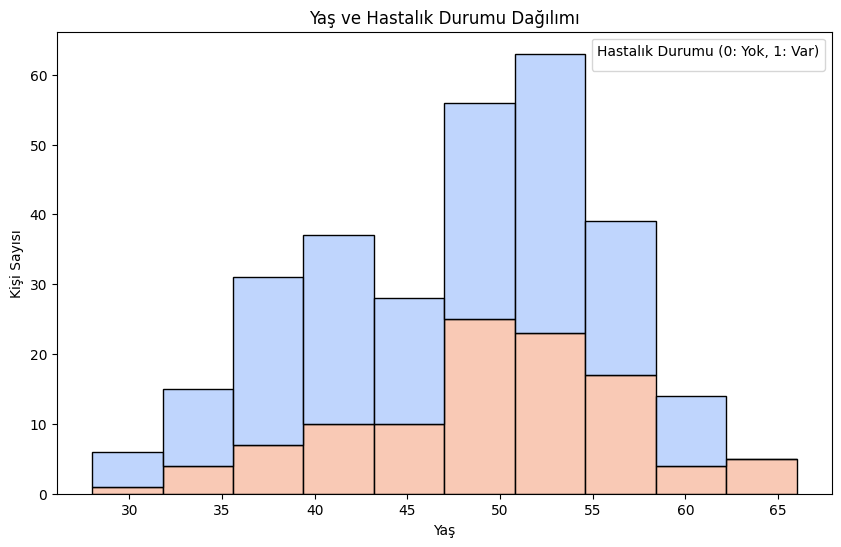

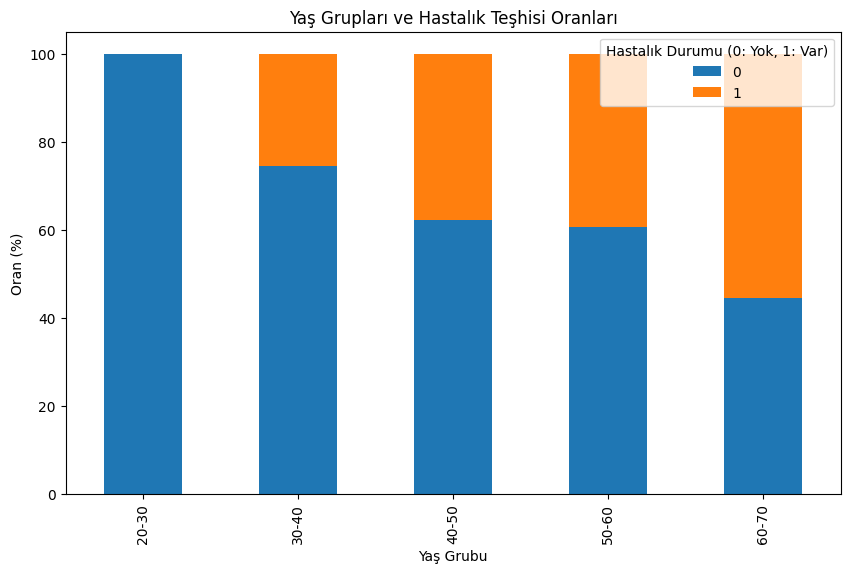

In [4]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Yaş dağılımını ve hastalık durumunu görselleştirme
plt.figure(figsize=(10, 6))
sns.histplot(data=cleaned_data, x='age', hue='num', bins=10, kde=False, palette="coolwarm", multiple="stack")
plt.title("Yaş ve Hastalık Durumu Dağılımı")
plt.xlabel("Yaş")
plt.ylabel("Kişi Sayısı")
plt.legend(title="Hastalık Durumu (0: Yok, 1: Var)")
plt.show()

# Yaş grupları oluşturma
cleaned_data['age_group'] = pd.cut(cleaned_data['age'], bins=[20, 30, 40, 50, 60, 70], labels=['20-30', '30-40', '40-50', '50-60', '60-70'])

# Yaş gruplarına göre hastalık teşhisi oranı
age_group_analysis = cleaned_data.groupby('age_group', observed=False)['num'].value_counts(normalize=True).unstack() * 100


# Görselleştirme
age_group_analysis.plot(kind='bar', stacked=True, figsize=(10, 6), color=['#1f77b4', '#ff7f0e'])
plt.title("Yaş Grupları ve Hastalık Teşhisi Oranları")
plt.xlabel("Yaş Grubu")
plt.ylabel("Oran (%)")
plt.legend(title="Hastalık Durumu (0: Yok, 1: Var)")
plt.show()


# 2. Demografik Analizler
Cinsiyetin Hastalık Riski Üzerindeki Etkisi, Yaş Gruplarına Göre Hastalık Oranları, Cinsiyet ve Yaş Gruplarına Göre Hastalık Oranları , Cinsiyet, Yaş ve Hastalık Oranlarının Isı Haritası

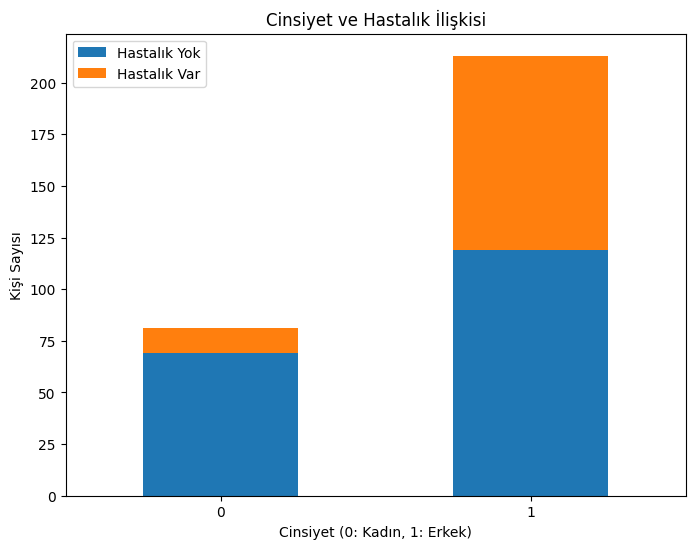

<ipython-input-6-bbafe47e20ee>:28: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  age_group_disease = data.groupby(['age_group', 'num']).size().unstack()


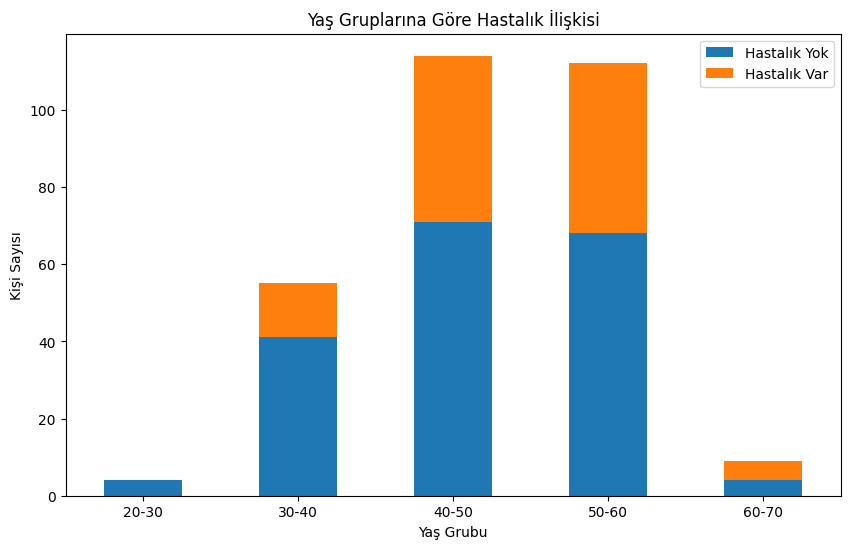

<ipython-input-6-bbafe47e20ee>:38: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  sex_age_group = data.groupby(['sex', 'age_group', 'num']).size().unstack()


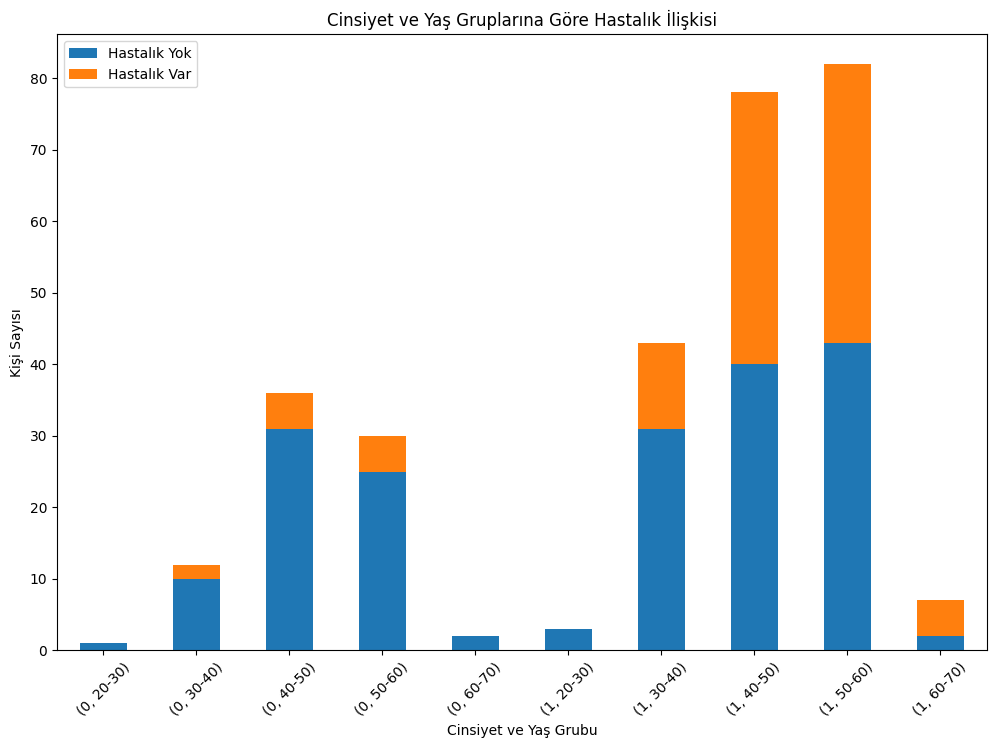

<ipython-input-6-bbafe47e20ee>:48: FutureWarning: The default value of observed=False is deprecated and will change to observed=True in a future version of pandas. Specify observed=False to silence this warning and retain the current behavior
  heatmap_data = data.pivot_table(index='age_group', columns='sex', values='num', aggfunc='mean')


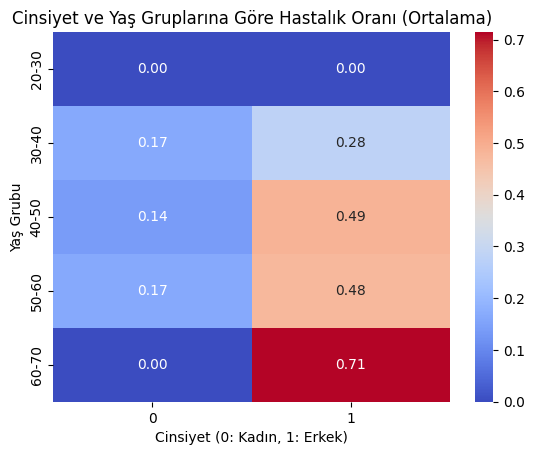

In [6]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


file_path = "/content/cleaned_data_fixed.csv"
data = pd.read_csv(file_path)


data.columns = data.columns.str.strip()


sex_disease = data.groupby(['sex', 'num']).size().unstack()
sex_disease.plot(kind='bar', stacked=True, figsize=(8, 6))
plt.title('Cinsiyet ve Hastalık İlişkisi')
plt.xlabel('Cinsiyet (0: Kadın, 1: Erkek)')
plt.ylabel('Kişi Sayısı')
plt.legend(['Hastalık Yok', 'Hastalık Var'])
plt.xticks(rotation=0)
plt.show()


bins = [20, 30, 40, 50, 60, 70]
labels = ['20-30', '30-40', '40-50', '50-60', '60-70']
data['age_group'] = pd.cut(data['age'], bins=bins, labels=labels)
age_group_disease = data.groupby(['age_group', 'num']).size().unstack()
age_group_disease.plot(kind='bar', stacked=True, figsize=(10, 6))
plt.title('Yaş Gruplarına Göre Hastalık İlişkisi')
plt.xlabel('Yaş Grubu')
plt.ylabel('Kişi Sayısı')
plt.legend(['Hastalık Yok', 'Hastalık Var'])
plt.xticks(rotation=0)
plt.show()


sex_age_group = data.groupby(['sex', 'age_group', 'num']).size().unstack()
sex_age_group.plot(kind='bar', stacked=True, figsize=(12, 8))
plt.title('Cinsiyet ve Yaş Gruplarına Göre Hastalık İlişkisi')
plt.xlabel('Cinsiyet ve Yaş Grubu')
plt.ylabel('Kişi Sayısı')
plt.legend(['Hastalık Yok', 'Hastalık Var'])
plt.xticks(rotation=45)
plt.show()

heatmap_data = data.pivot_table(index='age_group', columns='sex', values='num', aggfunc='mean')
sns.heatmap(heatmap_data, annot=True, fmt='.2f', cmap='coolwarm')
plt.title('Cinsiyet ve Yaş Gruplarına Göre Hastalık Oranı (Ortalama)')
plt.xlabel('Cinsiyet (0: Kadın, 1: Erkek)')
plt.ylabel('Yaş Grubu')
plt.show()


# 3. İstatistiksel Modelleme ve Makine Öğrenimi için lojistik regresyon tabanlı bir model

Doğruluk Oranı: 0.83

Karışıklık Matrisi:
[[32  6]
 [ 4 17]]

Sınıflandırma Raporu:
              precision    recall  f1-score   support

           0       0.89      0.84      0.86        38
           1       0.74      0.81      0.77        21

    accuracy                           0.83        59
   macro avg       0.81      0.83      0.82        59
weighted avg       0.84      0.83      0.83        59


Özellik Önem Skorları:
     Feature  Importance
9    oldpeak    1.099669
10     slope    0.863528
2         cp    0.759962
1        sex    0.594781
8      exang    0.563602
5        fbs    0.334129
4       chol    0.250096
0        age    0.101259
11        ca    0.000000
12      thal   -0.023134
7    thalach   -0.028351
6    restecg   -0.130477
3   trestbps   -0.133306


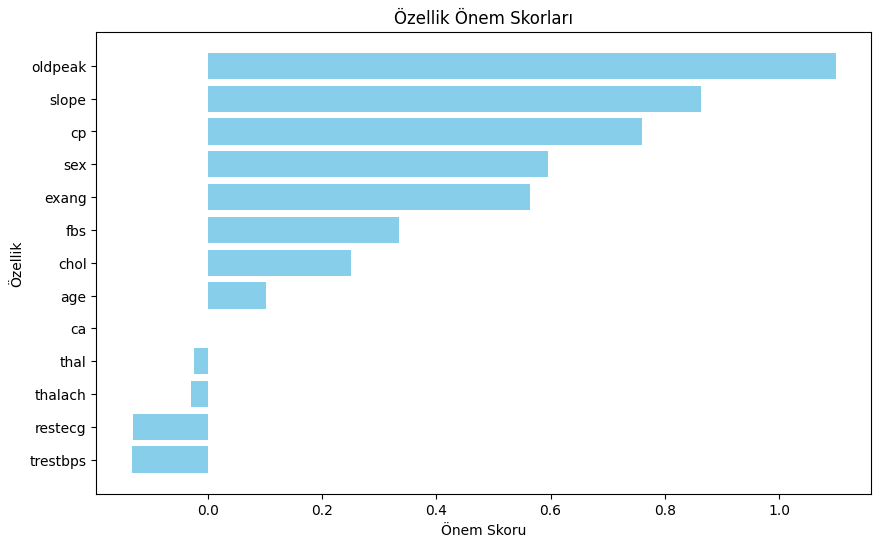

In [10]:
# İstatistiksel Modelleme ve Makine Öğrenimi

import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.preprocessing import StandardScaler


file_path = "/content/cleaned_data_fixed.csv"
data = pd.read_csv(file_path)


data.columns = data.columns.str.strip()


X = data.drop(['num'], axis=1)
y = data['num']


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


model = LogisticRegression()
model.fit(X_train, y_train)


y_pred = model.predict(X_test)


accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)

print(f"Doğruluk Oranı: {accuracy:.2f}")
print("\nKarışıklık Matrisi:")
print(conf_matrix)
print("\nSınıflandırma Raporu:")
print(class_report)


feature_importance = pd.DataFrame({'Feature': data.drop(['num'], axis=1).columns,
                                   'Importance': model.coef_[0]})
feature_importance = feature_importance.sort_values(by='Importance', ascending=False)
print("\nÖzellik Önem Skorları:")
print(feature_importance)


import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.barh(feature_importance['Feature'], feature_importance['Importance'], color='skyblue')
plt.title('Özellik Önem Skorları')
plt.xlabel('Önem Skoru')
plt.ylabel('Özellik')
plt.gca().invert_yaxis()
plt.show()


In [12]:

test_data = pd.DataFrame({
    'age': [45], 'sex': [1], 'cp': [3], 'trestbps': [120], 'chol': [240],
    'fbs': [0], 'restecg': [1], 'thalach': [150], 'exang': [0], 'oldpeak': [0.5],
    'slope': [2], 'ca': [0], 'thal': [7]
})

test_data2 = pd.DataFrame({
    'age': [35],
    'sex': [0],
    'cp': [2],
    'trestbps': [130],
    'chol': [250],
    'fbs': [1],
    'restecg': [0],
    'thalach': [160],
    'exang': [1],
    'oldpeak': [1.2],
    'slope': [1],
    'ca': [2],
    'thal': [3]
})


test_data_scaled = scaler.transform(test_data)


test_prediction = model.predict(test_data_scaled)
test_probability = model.predict_proba(test_data_scaled)

print("\nYeni Test Verisi Tahmini:")
print(f"Tahmin: {test_prediction[0]} (0: Hastalık Yok, 1: Hastalık Var)")
print(f"Hastalık Yok Olasılığı: {test_probability[0][0]:.2f}")
print(f"Hastalık Var Olasılığı: {test_probability[0][1]:.2f}")

#test data 2

test_data2_scaled = scaler.transform(test_data2)

test_prediction2 = model.predict(test_data2_scaled)
test_probability2 = model.predict_proba(test_data2_scaled)

print("\nYeni Test Verisi Tahmini:")
print(f"Tahmin: {test_prediction2[0]} (0: Hastalık Yok, 1: Hastalık Var)")
print(f"Hastalık Yok Olasılığı: {test_probability2[0][0]:.2f}")
print(f"Hastalık Var Olasılığı: {test_probability2[0][1]:.2f}")


Yeni Test Verisi Tahmini:
Tahmin: 0 (0: Hastalık Yok, 1: Hastalık Var)
Hastalık Yok Olasılığı: 0.73
Hastalık Var Olasılığı: 0.27

Yeni Test Verisi Tahmini:
Tahmin: 0 (0: Hastalık Yok, 1: Hastalık Var)
Hastalık Yok Olasılığı: 0.97
Hastalık Var Olasılığı: 0.03



ROC-AUC Skoru: 0.93


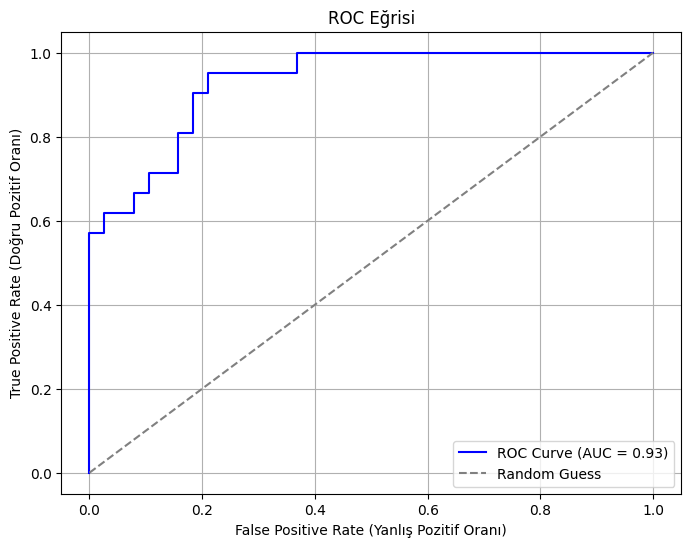

In [15]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_auc_score, roc_curve
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
# ROC-AUC Analizi
# ROC-AUC Skoru

X = data.drop(['num'], axis=1)
y = data['num']


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

model = LogisticRegression()
model.fit(X_train, y_train)

y_prob = model.predict_proba(X_test)[:, 1]  # Pozitif sınıf için olasılıklar



roc_auc = roc_auc_score(y_test, y_prob)
print(f"\nROC-AUC Skoru: {roc_auc:.2f}")

# ROC Eğrisi
fpr, tpr, thresholds = roc_curve(y_test, y_prob)
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label=f'ROC Curve (AUC = {roc_auc:.2f})', color='blue')
plt.plot([0, 1], [0, 1], linestyle='--', color='gray', label='Random Guess')
plt.title('ROC Eğrisi')
plt.xlabel('False Positive Rate (Yanlış Pozitif Oranı)')
plt.ylabel('True Positive Rate (Doğru Pozitif Oranı)')
plt.legend(loc='lower right')
plt.grid()
plt.show()